In [1]:
import tensorflow as tf

In [2]:
!pip install tensorflow

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.1 MB 5.2 MB/s eta 0:01:13
   ---------------------------------------- 0.7/377.1 MB 6.9 MB/s eta 0:00:55
   ---------------------------------------- 1.1/377.1 MB 8.0 MB/s eta 0:00:47
   ---------------------------------------- 1.4/377.1 MB 7.7 MB/s eta 0:00:49
   ---------------------------------------- 1.8/377.1 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 2.2/377.1 MB 7.9 MB/s eta 0:00:48
   ---------------------------------------- 2.4/377.1 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 2.7/377.1 MB 7.2 MB/s eta 0:00:52
   ---------------------------------------- 2.8/377.1 MB 7.2 MB/s eta 0:00:53
   ---------------------------------------- 3.1/377.1 MB 6.6 MB/s eta 0:00:

In [61]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -------------- ------------------------ 61.4/162.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 2.8 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.6 MB 3.4 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.6 MB 3.4 MB/s eta 0:00:03
   - -------------------------------------- 0.4/7.6 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/7.6 MB 2.6 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.6 MB 3.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.6 MB 4.0 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.6 MB 4.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.6 MB 4.0 MB/s eta 0:00:02
   ---------- 

In [8]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_disease",
    shuffle = "True",
    image_size = (img_size, img_size),
    batch_size = batch_size1
)

Found 2152 files belonging to 3 classes.


In [7]:
img_size = 256
batch_size1 = 32

In [9]:
print(df.class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [23]:
class_names = df.class_names

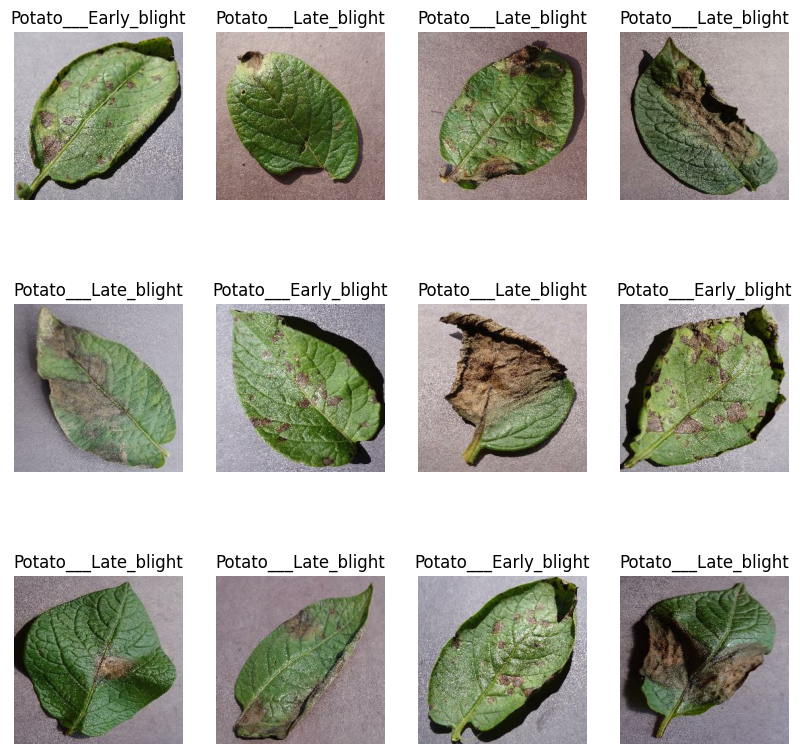

In [32]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Test-Train Split

In [33]:
def get_data_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1, shuffle="True", shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [34]:
train_ds, val_ds, test_ds = get_data_tf(df)

In [36]:
len(train_ds)

54

In [47]:
CHANNELS = 3  # For RGB images

In [39]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [43]:
# resize_and_rescale = tf.keras.Sequential([
#     layers.experimental.processing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     layers.experimental.preprossing.Rescaling(1.0/255)
    
# ])

'''
In TensorFlow 2.6 and later, the experimental preprocessing layers have been moved out of the layers.experimental module. 
Instead, they are available directly under the tf.keras.layers module.
'''

'\nIn TensorFlow 2.6 and later, the experimental preprocessing layers have been moved out of the layers.experimental module. \nInstead, they are available directly under the tf.keras.layers module.\n'

In [42]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_size, img_size),
    tf.keras.layers.Rescaling(1.0/255)
])


In [45]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal and vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [48]:
input_shape = (batch_size1, img_size, img_size, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\daivi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [51]:
history = model.fit(
    train_ds,
    batch_size= batch_size1,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 650ms/step - accuracy: 0.4427 - loss: 0.9521 - val_accuracy: 0.4896 - val_loss: 0.8604
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 0.5697 - loss: 0.8092 - val_accuracy: 0.7344 - val_loss: 0.5827
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 492ms/step - accuracy: 0.7588 - loss: 0.5752 - val_accuracy: 0.8802 - val_loss: 0.3268
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 482ms/step - accuracy: 0.8670 - loss: 0.3507 - val_accuracy: 0.9010 - val_loss: 0.2586
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 451ms/step - accuracy: 0.8749 - loss: 0.2869 - val_accuracy: 0.9219 - val_loss: 0.2308
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 444ms/step - accuracy: 0.9194 - loss: 0.2113 - val_accuracy: 0.9010 - val_loss: 0.2231
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 463ms/step - accuracy: 0.9056 - loss: 0.2113 - val_accuracy: 0.9167 - val_loss: 0.2698
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 450ms/step - accuracy: 0.9163 - loss: 0.2138 - val_accu

In [53]:
scores = model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9901 - loss: 0.0260


[0.010751993395388126, 0.99609375]

In [55]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [58]:
EPOCHS=50

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

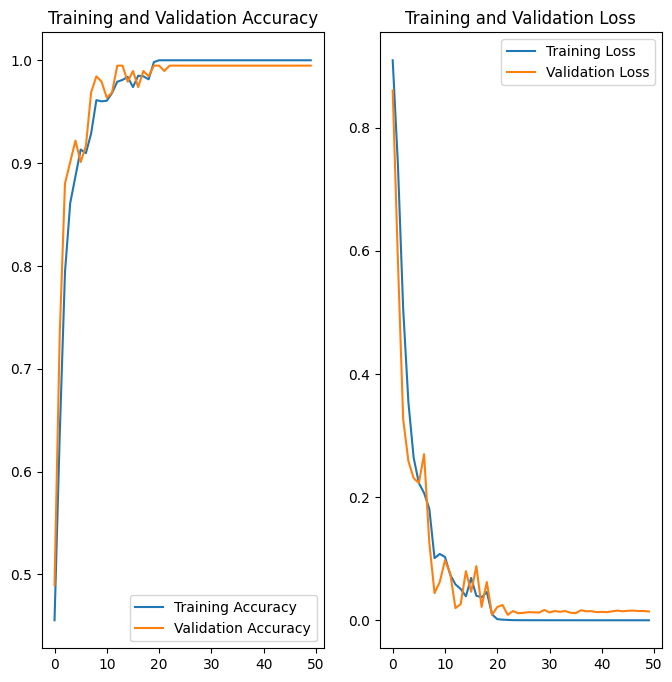

In [59]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image for prediction
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
predicted label: Potato___Late_blight


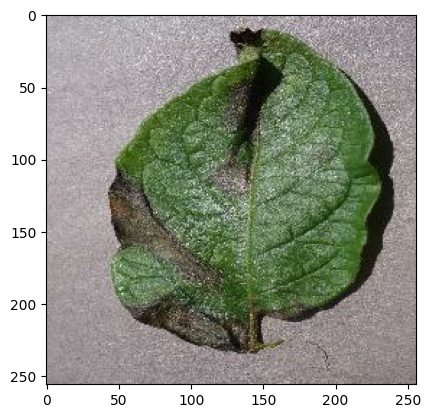

In [63]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image for prediction")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])